## Version of Read Hand Made Specifically for ResNetModel

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from copy import copy
%matplotlib inline

In [2]:
os.chdir('/Users/joeholt/Documents/College Local/Current/CS 639/proj') 

In [4]:
img_paths = ['/Users/joeholt/Documents/College Local/Current/CS 639/proj/test/test_imgs/frame2_empty.jpg',
 '/Users/joeholt/Documents/College Local/Current/CS 639/proj/test/test_imgs/frame2_hand.jpg',
 '/Users/joeholt/Documents/College Local/Current/CS 639/proj/test/test_imgs/frame_hand_thumbs_up.jpg']
imgs = [cv2.imread(path, 1) for path in img_paths]
bg = imgs[0]
hand = imgs[1]
diff = imgs[2]

In [5]:
imshow = lambda im: plt.imshow(im, cmap='gray')
def imshow_group(imgs):
    f, axarr = plt.subplots(1,len(imgs), figsize=(20, 6))
    for idx, img in enumerate(imgs):
        axarr[idx].imshow(img, cmap='gray')

In [6]:
def cvt_gray(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img_gray
diff_gray = cvt_gray(diff)

In [16]:
def create_mask(bg_gray, fg_gray, smooth=True):
    # subtract
    mask = cv2.subtract(bg_gray, fg_gray)
    # smooth
    mask_smooth = mask
    if smooth:
        kernel = np.ones((5,5),np.float32)/25
        mask_smooth = cv2.filter2D(mask, -1, kernel)
    # return
    mask_idx = (mask_smooth != 0)
    return mask_smooth, mask_idx

In [17]:
def apply_mask(fg, mask):
    new_img = copy(fg)
    new_img[mask] = 0
    return new_img

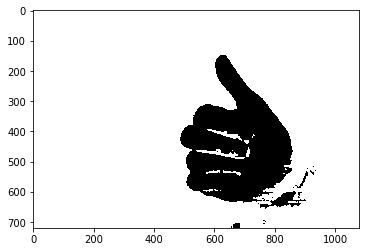

In [18]:
bg_gray = cvt_gray(bg)
hand_gray = cvt_gray(hand)
mask, idxs = create_mask(bg_gray, hand_gray)
masked = apply_mask(hand, idxs)
imshow(idxs)

# NP Methods

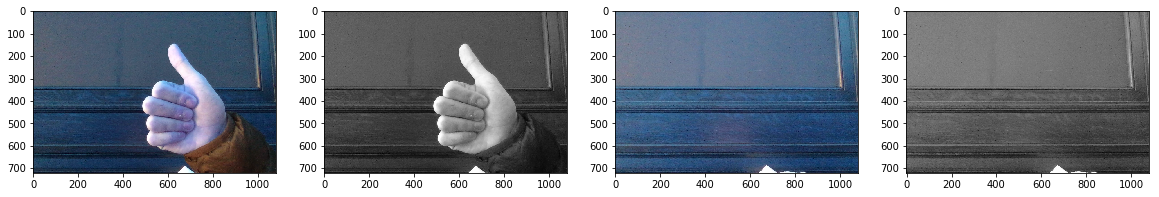

In [45]:
hand = hand
bg = bg
hand_gray = cvt_gray(hand)
bg_gray = cvt_gray(bg)
imshow_group([hand, hand_gray, bg, bg_gray])

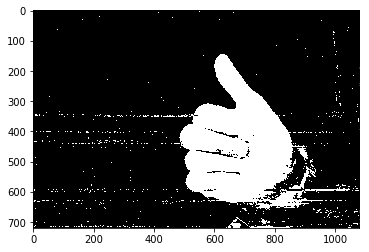

In [51]:
diff = hand_gray - bg_gray
diff_bg_idxs = (diff < 200)

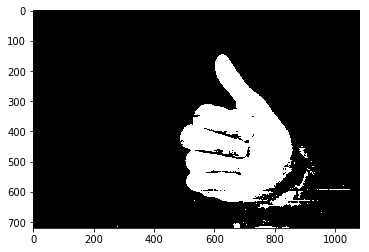

In [58]:
from scipy.ndimage import gaussian_filter
smoothed = gaussian_filter(diff_bg_idxs, sigma=0.2)
imshow(smoothed)